Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Generate 1000 data of 5 classes randomely

In [ ]:
#seed which will make the values same every time generated by random
np.random.seed(42)

# Generate 5-class 2D data
n_samples = 1000

#centers for every classes
centers = [
    (0, 0),     # Class 0
    (5, 5),     # Class 1
    (-5, 5),    # Class 2
    (5, -5),    # Class 3
    (-5, -5)    # Class 4
]
spread = 0.9 #distance from every regions

X = []
Y = []

for idx, (cx, cy) in enumerate(centers):
    points = np.random.randn(n_samples // 5, 2) * spread + [cx, cy]
    X.append(points)
    Y.append(np.full((n_samples // 5, 1), idx))

X = np.vstack(X)
Y = np.vstack(Y)


print("Generated X and Y values (first 20 samples for every class):")
for i in range(1000):
    if 0 <= i < 20:
        print(f"{i} X: {X[i]}, Y: {Y[i][0]}")
    elif 200 <= i < 220:
        print(f"{i} X: {X[i]}, Y: {Y[i][0]}")
    elif 400 <= i < 420:
        print(f"{i} X: {X[i]}, Y: {Y[i][0]}")
    elif 600 <= i < 620:
        print(f"{i} X: {X[i]}, Y: {Y[i][0]}")
    elif 800 <= i < 820:
        print(f"{i} X: {X[i]}, Y: {Y[i][0]}")
    else:
      pass



Generated X and Y values (first 20 samples for every class):
0 X: [ 0.44704274 -0.12443787], Y: 0
1 X: [0.58291968 1.37072687], Y: 0
2 X: [-0.21073804 -0.21072326], Y: 0
3 X: [1.42129153 0.69069126], Y: 0
4 X: [-0.42252695  0.48830404], Y: 0
5 X: [-0.41707592 -0.41915678], Y: 0
6 X: [ 0.21776604 -1.72195222], Y: 0
7 X: [-1.55242605 -0.50605878], Y: 0
8 X: [-0.91154801  0.2828226 ], Y: 0
9 X: [-0.81722167 -1.27107333], Y: 0
10 X: [ 1.31908389 -0.20319867], Y: 0
11 X: [ 0.06077538 -1.28227337], Y: 0
12 X: [-0.48994445  0.09983033], Y: 0
13 X: [-1.03589422  0.33812822], Y: 0
14 X: [-0.54057482 -0.26252437], Y: 0
15 X: [-0.54153595  1.66705037], Y: 0
16 X: [-0.0121475  -0.95193984], Y: 0
17 X: [ 0.74029042 -1.09875928], Y: 0
18 X: [ 0.18797724 -1.76370311], Y: 0
19 X: [-1.19536744  0.17717511], Y: 0
200 X: [3.56501511 4.46056248], Y: 1
201 X: [5.00471933 5.04228253], Y: 1
202 X: [4.59494108 5.56056494], Y: 1
203 X: [4.03914161 4.87185846], Y: 1
204 X: [5.10826607 5.46299495], Y: 1
205 X: [

Normalize X to [0,1]

In [ ]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_normalized = (X - X_min) / (X_max - X_min)


print("Generated X and Y values after normalization (first 20 samples for every class):")
for i in range(1000):
    if 0 <= i < 20:
        print(f"{i} new X: {X_normalized[i]}, Y: {Y[i][0]}")
    elif 200 <= i < 220:
        print(f"{i} new X: {X_normalized[i]}, Y: {Y[i][0]}")
    elif 400 <= i < 420:
        print(f"{i} new X: {X_normalized[i]}, Y: {Y[i][0]}")
    elif 600 <= i < 620:
        print(f"{i} new X: {X_normalized[i]}, Y: {Y[i][0]}")
    elif 800 <= i < 820:
        print(f"{i} new X: {X_normalized[i]}, Y: {Y[i][0]}")
    else:
      pass



Generated X and Y values after normalization (first 20 samples for every class):
0 new X: [0.51828484 0.50094336], Y: 0
1 new X: [0.52722182 0.60051816], Y: 0
2 new X: [0.47502089 0.49519694], Y: 0
3 new X: [0.58236371 0.55522923], Y: 0
4 new X: [0.46109099 0.54175068], Y: 0
5 new X: [0.46144952 0.48131571], Y: 0
6 new X: [0.50320472 0.3945523 ], Y: 0
7 new X: [0.3867746  0.47552822], Y: 0
8 new X: [0.42892681 0.52806605], Y: 0
9 new X: [0.4351309  0.42457988], Y: 0
10 new X: [0.57564124 0.49569806], Y: 0
11 new X: [0.49287904 0.42383398], Y: 0
12 new X: [0.45665677 0.51587915], Y: 0
13 new X: [0.42074824 0.53174928], Y: 0
14 new X: [0.45332667 0.4917471 ], Y: 0
15 new X: [0.45326346 0.62025268], Y: 0
16 new X: [0.48808271 0.44583349], Y: 0
17 new X: [0.5375725  0.43605563], Y: 0
18 new X: [0.50124543 0.39177178], Y: 0
19 new X: [0.41025927 0.52103015], Y: 0
200 new X: [0.72336196 0.80629465], Y: 1
201 new X: [0.81805503 0.84503598], Y: 1
202 new X: [0.79110286 0.87955248], Y: 1
203 ne

Split 80/20 (training and testing) with class distribution

In [ ]:
train_X, train_Y = [], []
test_X, test_Y = [], []

for c in np.unique(Y):
    class_idx = np.where(Y.flatten() == c)[0]
    np.random.shuffle(class_idx)  # shuffle indices for this class

    n_total = len(class_idx)
    n_train = int(0.8 * n_total)

    train_idx = class_idx[:n_train]
    test_idx = class_idx[n_train:]

    train_X.append(X_normalized[train_idx])
    train_Y.append(Y[train_idx])
    test_X.append(X_normalized[test_idx])
    test_Y.append(Y[test_idx])

train_X = np.vstack(train_X)
train_Y = np.vstack(train_Y)
test_X = np.vstack(test_X)
test_Y = np.vstack(test_Y)

print("Shapes")
print(f"train_X: {train_X.shape}, train_Y: {train_Y.shape}")
print(f"test_X: {test_X.shape}, test_Y: {test_Y.shape}")



Shapes
train_X: (800, 2), train_Y: (800, 1)
test_X: (200, 2), test_Y: (200, 1)


shuffle all the splits

In [ ]:
def shuffle_data(X, Y):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], Y[idx]

train_X, train_Y = shuffle_data(train_X, train_Y)
test_X, test_Y = shuffle_data(test_X, test_Y)


print("First 20 shuffled train samples:")
for i in range(20):
    print(f"train_X: {train_X[i]}, train_Y: {train_Y[i][0]}")

First 20 shuffled train samples:
train_X: [0.19322254 0.15853075], train_Y: 4
train_X: [0.67787006 0.11571995], train_Y: 3
train_X: [0.27256034 0.17260538], train_Y: 4
train_X: [0.83687465 0.16739426], train_Y: 3
train_X: [0.52582666 0.54689249], train_Y: 0
train_X: [0.47587813 0.53063531], train_Y: 0
train_X: [0.12228839 0.91348743], train_Y: 2
train_X: [0.20201497 0.15013906], train_Y: 4
train_X: [0.41025927 0.52103015], train_Y: 0
train_X: [0.21152268 0.87193027], train_Y: 2
train_X: [0.77554749 0.84859927], train_Y: 1
train_X: [0.82258855 0.17031402], train_Y: 3
train_X: [0.91511904 0.8272933 ], train_Y: 1
train_X: [0.733784   0.07070176], train_Y: 3
train_X: [0.91608342 0.1488438 ], train_Y: 3
train_X: [0.19043968 0.18700507], train_Y: 4
train_X: [0.8823451  0.21275185], train_Y: 3
train_X: [0.10186006 0.82875597], train_Y: 2
train_X: [0.16788991 0.80025614], train_Y: 2
train_X: [0.78209649 0.20433871], train_Y: 3


Visualize by plotting

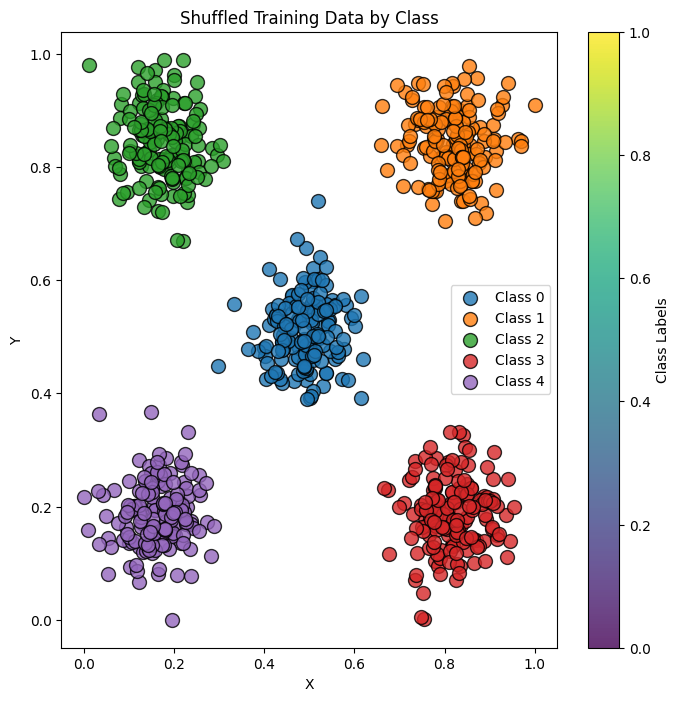

In [ ]:
plt.figure(figsize=(8,8))
for c in np.unique(train_Y):
    sct = plt.scatter(train_X[train_Y.flatten()==c,0], train_X[train_Y.flatten()==c,1],edgecolor="k",s=100, label=f"Class {c}", alpha=0.8)
plt.colorbar(sct, label="Class Labels")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Shuffled Training Data by Class")
plt.show()

convert class labels to one-hot encoding

In [ ]:
def one_hot_encode(Y, num_classes=5):
    one_hot = np.zeros((Y.shape[0], num_classes))
    one_hot[np.arange(Y.shape[0]), Y.flatten()] = 1
    return one_hot

train_Y_hot = one_hot_encode(train_Y)
test_Y_hot = one_hot_encode(test_Y)

train_Y_hot.shape, test_Y_hot.shape


((800, 5), (200, 5))

building neural network class

In [77]:
class NeuralNetwork(object):
    def __init__(self):
        # Number of neurons
        inputLayerNeurons = 2
        hiddenLayer_1_Neurons = 10
        hiddenLayer_2_Neurons = 8
        outLayerNeurons = 5

        self.learning_rate = 0.02

        # Initialize weights
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer_1_Neurons)
        self.W_H2 = np.random.randn(hiddenLayer_1_Neurons, hiddenLayer_2_Neurons)
        self.W_O  = np.random.randn(hiddenLayer_2_Neurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        #input for hidden layer 1
        hidden_1_input = np.dot(X, self.W_H1)
        # Hidden layer 1
        self.hidden_1_output = self.sigmoid(hidden_1_input)
        #input for hidden layer 2
        hidden_2_input = np.dot(self.hidden_1_output, self.W_H2)
        # Hidden layer 2
        self.hidden_2_output = self.sigmoid(hidden_2_input)
        #input for output layer
        output_input = np.dot(self.hidden_2_output, self.W_O)
        #output/prediction
        pred = self.softmax(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        # Error at output
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        # Hidden layer 2 error
        hidden_2_error = output_delta.dot(self.W_O.T)
        hidden_2_delta = self.learning_rate * hidden_2_error * self.sigmoid(self.hidden_2_output, der=True)

        # Hidden layer 1 error
        hidden1_error = hidden_2_delta.dot(self.W_H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden_1_output, der=True)

        # Update weights
        self.W_O  += self.hidden_2_output.T.dot(output_delta)
        self.W_H2 += self.hidden_1_output.T.dot(hidden_2_delta)
        self.W_H1 += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


Training Loop with Internal Validation

In [78]:
NN = NeuralNetwork()

epochs = 200
train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []
np.random.seed(1)


for epoch in range(epochs):

    idx = np.arange(train_X.shape[0])
    np.random.shuffle(idx)
    split = int(0.8 * len(idx))
    train_idx = idx[:split]
    val_idx = idx[split:]

    X_train_internal = train_X[train_idx]
    Y_train_internal = train_Y_hot[train_idx]
    X_val_internal = train_X[val_idx]
    Y_val_internal = train_Y_hot[val_idx]

    # Train
    NN.train(X_train_internal, Y_train_internal)

    # Training metrics
    pred_train = NN.feedForward(X_train_internal)
    train_loss = -np.mean(np.sum(Y_train_internal * np.log(pred_train + 1e-8), axis=1))
    train_acc = np.mean(np.argmax(pred_train, axis=1) == np.argmax(Y_train_internal, axis=1))

    # Validation metrics
    pred_val = NN.feedForward(X_val_internal)
    val_loss = -np.mean(np.sum(Y_val_internal * np.log(pred_val + 1e-8), axis=1))
    val_acc = np.mean(np.argmax(pred_val, axis=1) == np.argmax(Y_val_internal, axis=1))

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")




Epoch 1/200 | Train Loss: 2.9793, Train Acc: 0.3953 | Val Loss: 2.9560, Val Acc: 0.4062
Epoch 2/200 | Train Loss: 4.0690, Train Acc: 0.2094 | Val Loss: 4.7163, Val Acc: 0.1625
Epoch 3/200 | Train Loss: 5.1301, Train Acc: 0.2047 | Val Loss: 5.3737, Val Acc: 0.1812
Epoch 4/200 | Train Loss: 5.0406, Train Acc: 0.4094 | Val Loss: 5.2340, Val Acc: 0.3625
Epoch 5/200 | Train Loss: 3.7332, Train Acc: 0.2109 | Val Loss: 3.8836, Val Acc: 0.1562
Epoch 6/200 | Train Loss: 3.7621, Train Acc: 0.3063 | Val Loss: 3.6073, Val Acc: 0.3063
Epoch 7/200 | Train Loss: 3.3149, Train Acc: 0.4000 | Val Loss: 3.5417, Val Acc: 0.4000
Epoch 8/200 | Train Loss: 2.4224, Train Acc: 0.3391 | Val Loss: 2.9448, Val Acc: 0.2750
Epoch 9/200 | Train Loss: 1.8406, Train Acc: 0.4094 | Val Loss: 1.8076, Val Acc: 0.3625
Epoch 10/200 | Train Loss: 1.3022, Train Acc: 0.3781 | Val Loss: 1.2847, Val Acc: 0.4375
Epoch 11/200 | Train Loss: 1.2699, Train Acc: 0.4016 | Val Loss: 1.2376, Val Acc: 0.4375
Epoch 12/200 | Train Loss: 1.2

visualize accuracy and loss

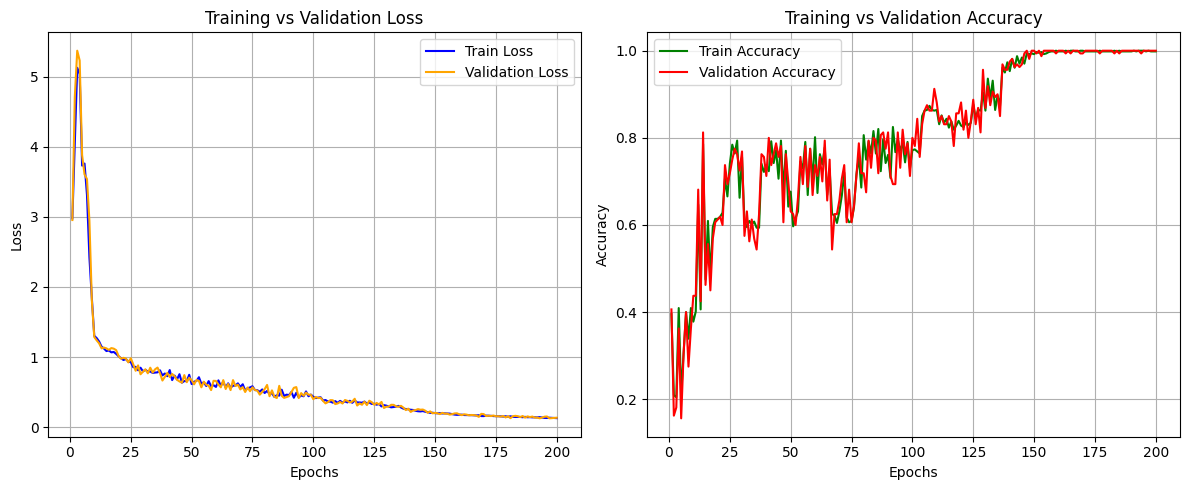

In [79]:

epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss', color='blue')
plt.plot(epochs_range, val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy', color='green')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


test the moodel

In [76]:

pred_test = NN.feedForward(test_X)

test_loss = -np.mean(np.sum(test_Y_hot * np.log(pred_test + 1e-8), axis=1))

test_acc = np.mean(np.argmax(pred_test, axis=1) == test_Y.flatten())

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Test Loss: 0.1299
Test Accuracy: 1.0000
